In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='amr7', api_key='4gj9vxlD7C63cCRCaRdU')

#iMac
#directory = '/Users/alexreblando/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ebs/usable_data'

#laptop
directory = '/Users/alexreblando/Documents/GitHub/ebs/usable_data'
directory_stories = '/Users/alexreblando/Documents/GitHub/ebs/story_xlsx_files'

filenames = glob.glob(directory+ '/*.csv')
filenames_stories = glob.glob(directory_stories + '/*.xlsx')

dfs = []
dfs_stories = []

for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
for filename in filenames_stories:
    dfs_stories.append(pd.read_excel(filename))

In [4]:
#create a dictionary for each participant, documenting which stories they read paired with the schema 
#they were assigned for that story
size_dfs = len(dfs)
participants = dict()

for s in range(size_dfs):
    this_dict = dict()
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    this_p = dfs[s]['participant'].iloc[0]
    for i in range(8):
        final_dict = {
            'story':story_list[i],
            'schema':schema_list[i],
        }
        
        this_dict[i+1] = final_dict
        
    participants[this_p] = this_dict



In [5]:
z = dfs[0].loc[dfs[0]['count'] == 3]
this = 'question'+str(1)+'_answer'
x = pd.notna(z[this])

for i in range(len(z)):
    if x.iloc[i] == True:
        hold = z['question1_answer'].iloc[i]
    


In [6]:
#indexing into a matrix
z = '4'
b = 'hello'

h = np.array([z, b, '1', '2', '3', '4'])
print(h)
temp = h[2:6]
print(temp)
temp =  np.roll(temp, 2)
print(temp)
h[2:6] = temp
print(h)
r = 'l'
g = 'o'
q = '5'
values2 = [r,g]
values2.append(q)
h = np.vstack([h, values2])
print(h)

v = h[h[:,0] == '4']
v[0, 1]


['4' 'hello' '1' '2' '3' '4']
['1' '2' '3' '4']
['3' '4' '1' '2']
['4' 'hello' '3' '4' '1' '2']


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [7]:
#create a dictionary for the answers to the 8 questions for each story, not parsing the questions 
#by primed or unprimed

question_answers = dict()

for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    #if the data file has a question portion
    if 'question1_answer' in dfs[s].columns:
        
        #get the question order of the stories ("primed v not-primed first")
        question_order = dfs[s]['order of question']
        which_one = pd.notna(question_order)
        question_order_list = []
        for k in range(len(question_order)):
            if which_one[k] == True:
                question_order_list.append(question_order[k])  
        
        #loop through all the stories 
        for i in range(8):
            new_questions = [dfs[s]['participant'].iloc[0], story_list[i], schema_list[i]]
            which_rows = dfs[s].loc[dfs[s]['count'] == i]
            tally_completed = 0
            #loop through all the questions
            for j in range(8):
                this_question = 'question'+str(j+1)+'_answer'
                which_cell = pd.notna(which_rows[this_question])
                any_answer = np.any(which_cell)
                if any_answer == False:
                    new_questions.append('')
                else:
                    for t in range(len(which_rows)):
                        if which_cell.iloc[t] == True:
                            hold = which_rows[this_question].iloc[t]
                            tally_completed = tally_completed + 1
                    new_questions.append(hold)
            
            #move the order of the stories, so that location questions always come first
            if tally_completed > 0:
                if question_order_list[i] == 'primed first' and schema_list[i] == 'Social':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                if question_order_list[i] == 'non-primed first' and schema_list[i] == 'Location':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                    
            #put all of the questions into dictionaries organized by story
            if story_list[i] in question_answers:
                question_answers[story_list[i]] = np.vstack((question_answers[story_list[i]], new_questions))
            else:
                question_answers[story_list[i]] = new_questions
                


In [8]:
#export each story answers to its own csv file
import csv

for key in question_answers:
    title = 'raw_recall/'+ key + '_recall_answers.csv'
    this_array = question_answers[key]
    with open(title, 'w') as csvfile:
        fieldnames = ['participant', 'story', 'schema', '1', '2', '3', '4','5', '6','7','8']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(len(this_array)):
            a = this_array[i, 0]
            b = this_array[i, 1]
            c = this_array[i, 2]
            d = this_array[i, 3]
            e = this_array[i, 4]
            f = this_array[i, 5]
            g = this_array[i, 6]
            h = this_array[i, 7]
            j = this_array[i, 8]
            k = this_array[i, 9]
            l = this_array[i, 10]
            writer.writerow({'participant': a, 'story': b, 'schema': c, '1': d, '2': e, '3': f, '4':g, '5':h, '6':j, '7':k,'8':l})

            
        

In [9]:
#return participants who have read a particular story
this_one = '44'

for key in participants:
    for key2 in participants[key]:
        if participants[key][key2]['story'] == this_one:
            print(key)
            print(participants[key][key2]['schema'])
            print(key2)

030119_p2
Social
8
030119_p3
Location
7
030419_p2
Location
5
030519_p1
Location
6
030719_p2
Location
1
030819_p1
Social
4
031219_p1
Social
2
031319_p1
Social
5
031319_p2
Location
2
031519_p2
Social
4
031519_p3
Social
4


In [10]:
#put all of the key presses into a dictionary, orginized by story
size_dfs = len(dfs)
loc_story_keys = dict()
soc_story_keys = dict()
for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    for i in range(8):
        keys = dfs[s]['story_presses.keys'].values[dfs[s]['count']==i]
        keys = keys[~np.isnan(keys)]
        if schema_list[i] == 'Location':
            if story_list[i] in loc_story_keys:
                loc_story_keys[story_list[i]] = np.concatenate((loc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                loc_story_keys[story_list[i]] = keys[:, np.newaxis]
        elif schema_list[i] == 'Social':
            if story_list[i] in soc_story_keys:
                soc_story_keys[story_list[i]] = np.concatenate((soc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                soc_story_keys[story_list[i]] = keys[:, np.newaxis]

In [11]:
#put all of the a priori story boundaries into a dictionary organized by story

all_story_priors = dict()

for s in range(16):
    this_story = str(int(dfs_stories[s]['story'].iloc[0]))
    keys2 = dfs_stories[s]['locationEvent'].values
    keys3 = dfs_stories[s]['socialEvent'].values
    all_story_priors[this_story] = keys2[:, np.newaxis]
    all_story_priors[this_story] = np.concatenate((all_story_priors[this_story], keys3[:, np.newaxis]), axis = 1)

In [12]:
#for participant responses, convert all '1' presses to 0 values, and '9' presses to 1 values

for key in soc_story_keys:
    this_array = soc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    soc_story_keys[key] = this_array
    
for key in loc_story_keys:
    this_array = loc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    loc_story_keys[key] = this_array
    


In [13]:
#sum the responses
loc_percent_story_keys = dict()
soc_percent_story_keys = dict()

for key in loc_story_keys:
    this_sum = np.sum(loc_story_keys[key], axis = 1)
    N = np.size(loc_story_keys[key],1)
    this_percent = this_sum/N
    loc_percent_story_keys[key] = this_percent[:, np.newaxis]
    
for key in soc_story_keys:
    this_sum = np.sum(soc_story_keys[key], axis = 1)
    N = np.size(soc_story_keys[key],1)
    this_percent = this_sum/N
    soc_percent_story_keys[key] = this_percent[:, np.newaxis]
    

In [14]:
#find the average number and standard deviation of participants in each story 
#also for story lengths

lengths = []
N = []

for key in loc_story_keys:
    x, y = loc_story_keys[key].shape
    x1, y1 = soc_story_keys[key].shape
    lengths.append(x)
    lengths.append(x1)
    N.append(y)
    N.append(y1)
    
length_mean = statistics.mean(lengths)
length_sd = statistics.stdev(lengths)

N_mean = statistics.mean(N)
N_sd = statistics.stdev(N)
print(length_mean, length_sd, N_mean, N_sd)

36.375 7.836021044283356 5.75 2.2718473369882592


In [15]:
#get the binary version of the a priori boundaries

for key in all_story_priors:
    location = all_story_priors[key][:,0]
    social = all_story_priors[key][:,1]
    for i in range(0, len(location)):  
        if location[i] > location[i-1]:
            location[i] = 7
    for i in range(0, len(location)):  
        if location[i] != 7:
            location[i] = 0
    for i in range(0, len(social)):
        if social[i] > social[i - 1]:
            social[i] = 7
    for i in range(0, len(social)):
        if social[i] != 7:
            social[i] = 0
    location[0] = 7
    social[0] = 7
    location2 = location > 1
    social2 = social > 1
    location2 = location2.astype(int)
    social2 = social2.astype(int)
    all_story_priors[key] = np.concatenate((all_story_priors[key], location2[:, np.newaxis]), axis = 1) 
    all_story_priors[key] = np.concatenate((all_story_priors[key], social2[:, np.newaxis]), axis = 1)

In [16]:
all_story_priors[key]

array([[7, 7, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [8]:
#show the stories
key = '13'
opacityPriors = 0.1

new_x = np.arange(len(all_story_priors[key]) + 1)
#new_x = np.delete(x_index, 0)
trace1 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,2], 
                mode = 'lines+markers', 
                name = 'location Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(0, 204, 0, .05)'),
                    width = 4))

trace2 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,3], 
                mode = 'lines+markers', 
                name = 'social Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(255, 91, 71, .05)'),
                    width = 4))

trace3 = go.Scatter(x = new_x, 
                    y = loc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participant w location',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(0, 191, 255, .5)'),
                        width = 4))

trace4 = go.Scatter(x = new_x, 
                    y = soc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participants w social',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(255, 215, 0, .5)'),
                        width = 4))


data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title= key,
    xaxis=dict(
        title='Sentence Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/Users/alexreblando/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [18]:
#find the mean correlation of the responses of participants with the same schema for each story and store the
#value in a dictionary
soc_cor = dict()
loc_cor = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    soc_this = np.nanmean(np.corrcoef(soc_story_keys[key].T)[np.triu(np.ones((z,z), dtype=np.bool),1)])
    soc_cor[key] = soc_this
    g = len(loc_story_keys[key][0])
    loc_this = np.nanmean(np.corrcoef(loc_story_keys[key].T)[np.triu(np.ones((g,g), dtype=np.bool),1)])
    loc_cor[key] = loc_this
    
print(soc_cor)

for key in soc_cor:
    print(key)
    print('loc:', loc_cor[key])
    print('soc:', soc_cor[key])
    


{'12': 0.1577916642824127, '31': 0.3302002762169798, '43': 0.3545245679456396, '24': 0.2336487172178229, '23': 0.20985257489672077, '11': 0.21468811705803534, '32': 0.1433510385893565, '44': 0.16894675451510968, '21': 0.24042685608175898, '33': 0.11916350888251724, '42': 0.19523681250099525, '14': 0.46291855274635, '13': 0.18156825980064079, '41': 0.1932993111817978, '34': 0.21484985796747316, '22': 0.09966453255402896}
12
loc: 0.19955380489428873
soc: 0.1577916642824127
31
loc: 0.3445297430531166
soc: 0.3302002762169798
43
loc: 0.16839215754740292
soc: 0.3545245679456396
24
loc: 0.14463698498546107
soc: 0.2336487172178229
23
loc: 0.306308013876848
soc: 0.20985257489672077
11
loc: 0.37711864406779627
soc: 0.21468811705803534
32
loc: 0.27504899982976055
soc: 0.1433510385893565
44
loc: 0.5805339172842425
soc: 0.16894675451510968
21
loc: 0.3825291232432217
soc: 0.24042685608175898
33
loc: 0.10887759855396663
soc: 0.11916350888251724
42
loc: 0.16630071268405713
soc: 0.19523681250099525
14


In [60]:
#find the averages of correlations across location schemas

loc_this_sum = loc_cor['14'] + loc_cor['24'] + loc_cor['34'] + loc_cor['44']
mean_loc = loc_this_sum/4
print(mean_loc)

0.36012283858321603


In [64]:
#find the averages of correlations across social schemas

soc_this_sum = soc_cor['41'] + soc_cor['42'] + soc_cor['43'] + soc_cor['44']
mean_soc = soc_this_sum/4
print(mean_soc)

0.2058440760392831


In [19]:
#correlation across the schemas 
isc_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    coef_matrix = np.corrcoef(new.T)
    this = coef_matrix[0:z,z:(z+x)]
    mean_isc = np.nanmean(this)
    isc_dict[key] = mean_isc
    
print(isc_dict)

{'12': 0.25664832661326425, '31': 0.38817565595027176, '43': 0.20043573877826265, '24': 0.15119165888307928, '23': 0.19438594801316078, '11': 0.24783198743442642, '32': 0.11318534025583046, '44': 0.17222516231954957, '21': 0.34683027578511294, '33': 0.18540924799423916, '42': 0.15655942054250466, '14': 0.4198602962574182, '13': 0.23352754960792155, '41': 0.20204691261880536, '34': 0.17746907126500122, '22': 0.16184556064948866}


In [20]:
#find the correlation between all participants' event boundaries and a priori boundaries
a_priori_corr_dict = dict()

for key in soc_story_keys:
    #concatenate the key presses for social and location primed participants for each story
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((new, loc))
    soc_new = np.hstack((new, soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
a_priori_corr_dict

{'12': [0.27563074769449647, 0.22997350496268823],
 '31': [0.3876289591977022, 0.24439836779554447],
 '43': [0.2919180091284066, 0.3753656534911778],
 '24': [0.24353315029330452, 0.1472329136115865],
 '23': [0.27886822978674647, 0.20863320276817396],
 '11': [0.2902387221579282, 0.30394594741665004],
 '32': [0.2193411440008728, 0.2109689873223882],
 '44': [0.40050190314268264, 0.16385684457237842],
 '21': [0.2147472726408966, 0.2569144690949767],
 '33': [0.2360427831469158, 0.18573078758507036],
 '42': [0.196214212053979, 0.1250044452058448],
 '14': [0.42295988649831806, 0.1218643354830364],
 '13': [0.3797243422194778, 0.06491381329201028],
 '41': [0.20296986596389163, 0.19482554071716637],
 '34': [0.3289045964503084, 0.26718904433290586],
 '22': [0.25178266481380396, 0.20551976487085433]}

In [23]:
#find the correlation between event boundaries of participants primed with location schemas and a priori boundaries
loc_a_priori_corr_dict = dict()

for key in soc_story_keys:
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((loc_story_keys[key], loc))
    soc_new = np.hstack((loc_story_keys[key], soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    loc_a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
loc_a_priori_corr_dict

{'12': [0.3198085319528382, 0.19998533231458224],
 '31': [0.39964442921078147, 0.19266628138398365],
 '43': [0.3826899490087515, 0.2234917835978697],
 '24': [0.3594170836582156, 0.1578804447850371],
 '23': [0.22545714282288934, 0.16948577299704223],
 '11': [0.288135593220339, 0.19915254237288127],
 '32': [0.2340542598020567, 0.23195296032804227],
 '44': [0.5567420840334558, 0.08715175044497457],
 '21': [0.35850178436081914, 0.34257623918803676],
 '33': [0.37602007859305125, 0.16278569081297597],
 '42': [0.3042080519951917, 0.1358782894816419],
 '14': [0.5793546812327525, 0.20200800931142612],
 '13': [0.41399053585675955, 0.02922211161207699],
 '41': [0.24775546576554586, 0.26015221660172133],
 '34': [0.39818249136577827, 0.24289703748197392],
 '22': [0.3150152344368339, 0.1488584294892969]}

In [21]:
#find the correlation between event boundaries of participants primed with social schemas and a priori boundaries
soc_a_priori_corr_dict = dict()

for key in soc_story_keys:
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((soc_story_keys[key], loc))
    soc_new = np.hstack((soc_story_keys[key], soc))
    if key == '41':
        print(soc_new)
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    soc_a_priori_corr_dict[key] = [avg_loc, avg_soc]

    


[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


0.27563074769449647
[0.27563074769449647, 0.22997350496268823, 0.3198085319528382, 0.19998533231458224, 0.2137818497328181, 0.27195694667003667, 0.19955380489428873, 0.1577916642824127, 0.25664832661326425]
0.3876289591977022
[0.3876289591977022, 0.24439836779554447, 0.39964442921078147, 0.19266628138398365, 0.3555877058294903, 0.38235059822637346, 0.3445297430531166, 0.3302002762169798, 0.38817565595027176]
0.2919180091284066
[0.2919180091284066, 0.3753656534911778, 0.3826899490087515, 0.2234917835978697, 0.24004832919678093, 0.4621507220016395, 0.16839215754740292, 0.3545245679456396, 0.20043573877826265]
0.24353315029330452
[0.24353315029330452, 0.1472329136115865, 0.3594170836582156, 0.1578804447850371, 0.17110569194023517, 0.14057820662817994, 0.14463698498546107, 0.2336487172178229, 0.15119165888307928]
0.27886822978674647
[0.27886822978674647, 0.20863320276817396, 0.22545714282288934, 0.16948577299704223, 0.353643751536146, 0.2634396044477586, 0.306308013876848, 0.20985257489672

<Figure size 432x288 with 0 Axes>

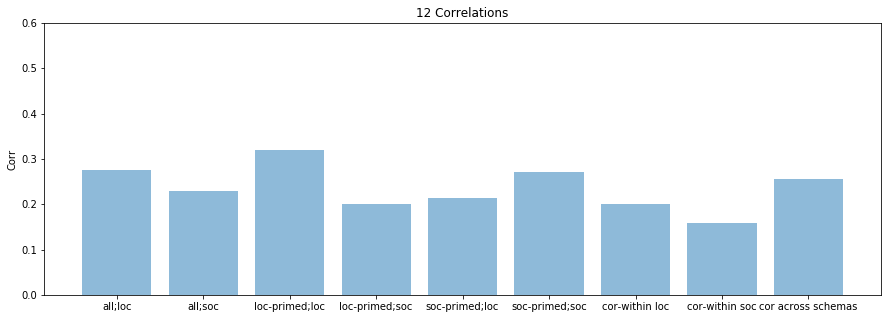

<Figure size 432x288 with 0 Axes>

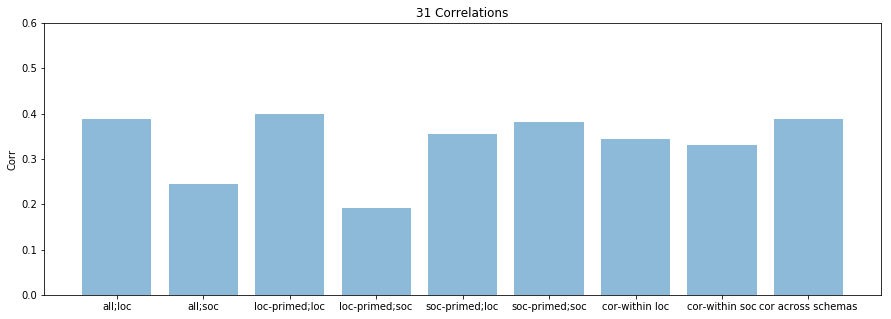

<Figure size 432x288 with 0 Axes>

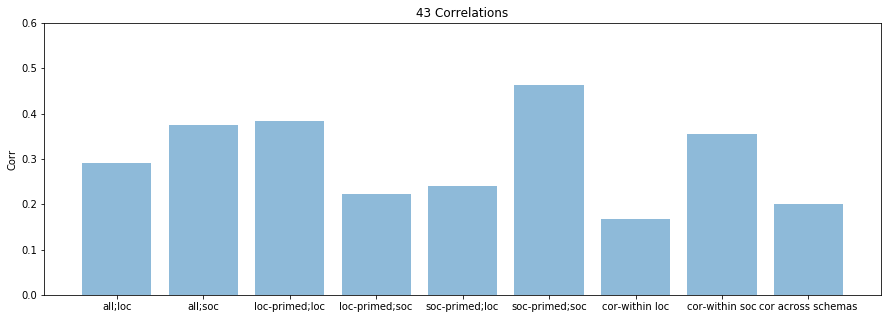

<Figure size 432x288 with 0 Axes>

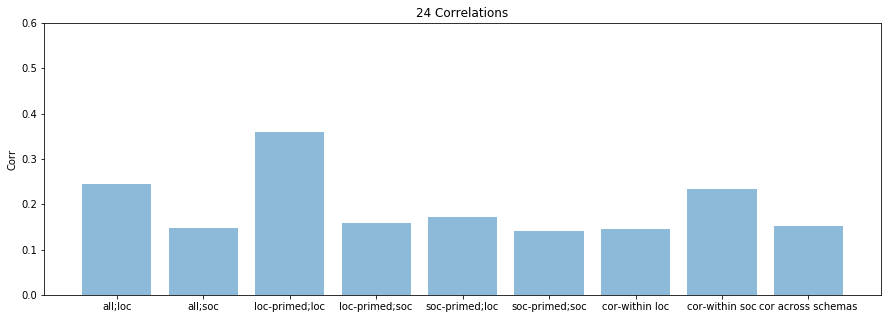

<Figure size 432x288 with 0 Axes>

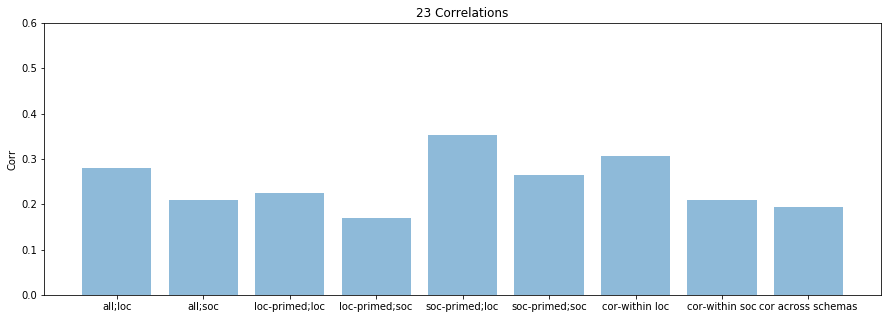

<Figure size 432x288 with 0 Axes>

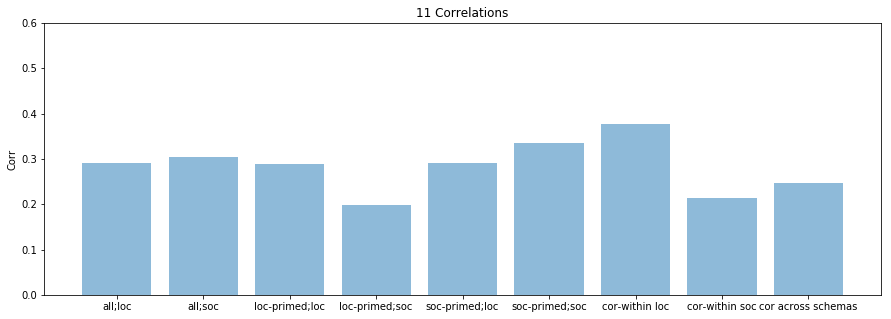

<Figure size 432x288 with 0 Axes>

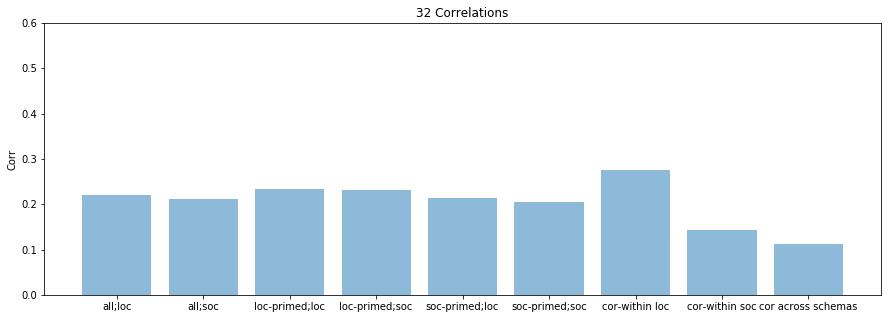

<Figure size 432x288 with 0 Axes>

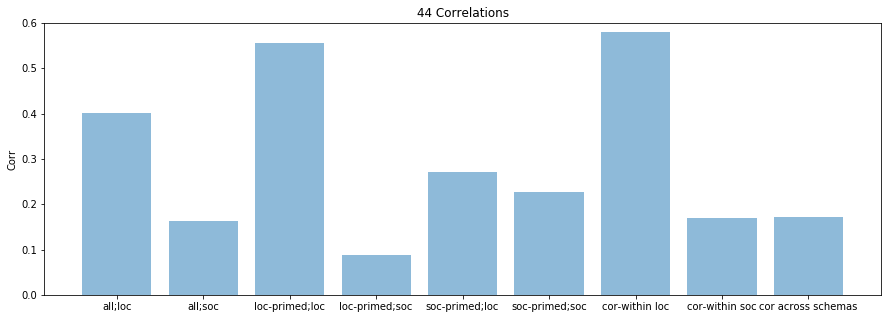

<Figure size 432x288 with 0 Axes>

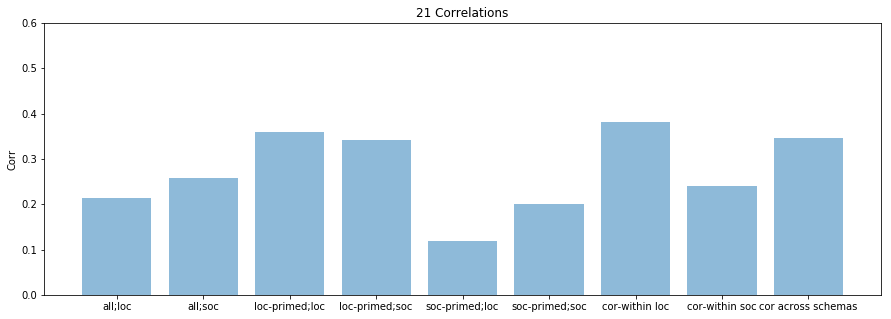

<Figure size 432x288 with 0 Axes>

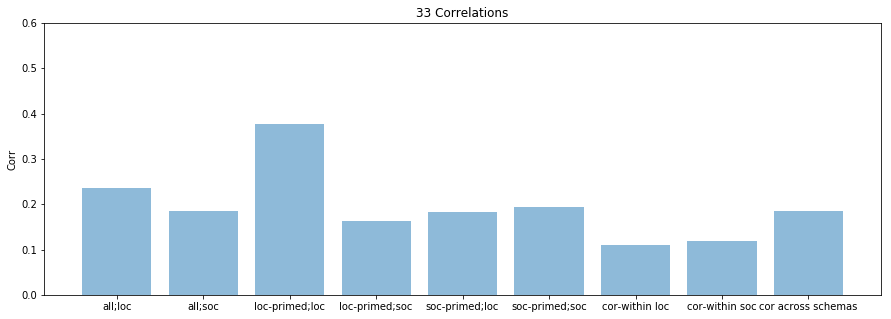

<Figure size 432x288 with 0 Axes>

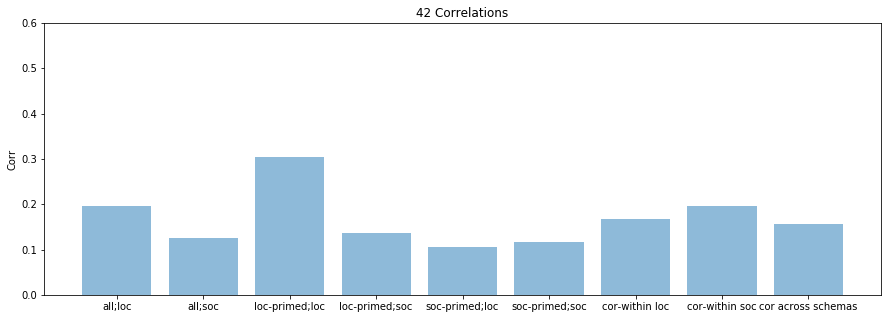

<Figure size 432x288 with 0 Axes>

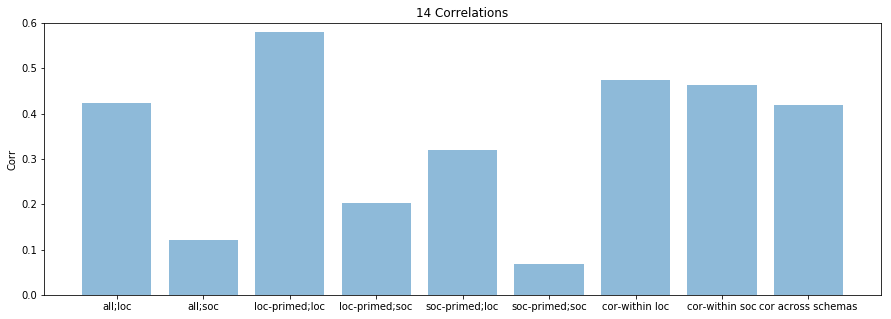

<Figure size 432x288 with 0 Axes>

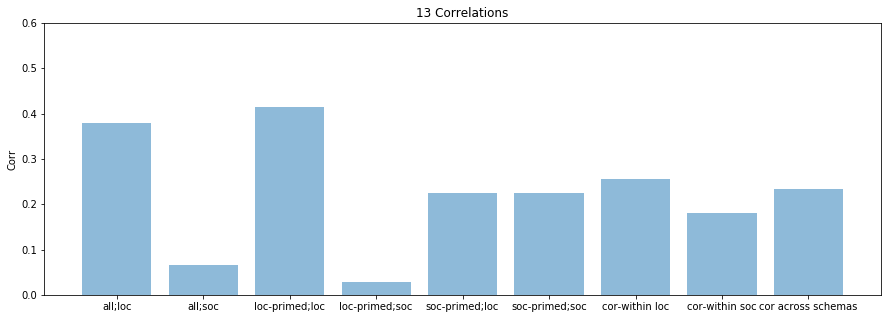

<Figure size 432x288 with 0 Axes>

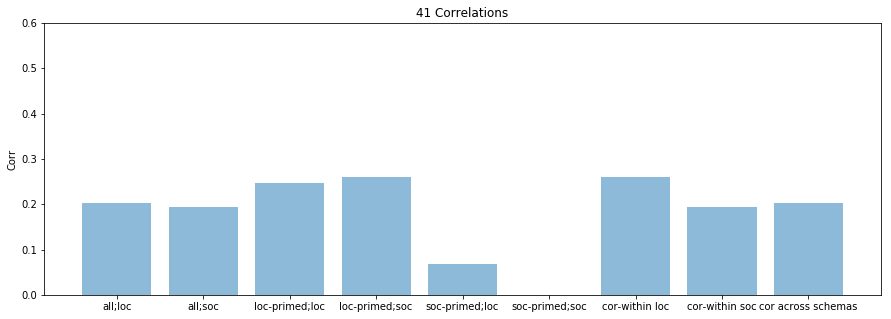

<Figure size 432x288 with 0 Axes>

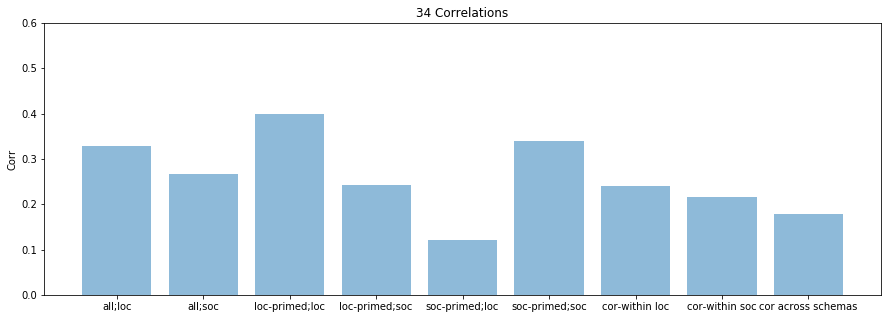

<Figure size 432x288 with 0 Axes>

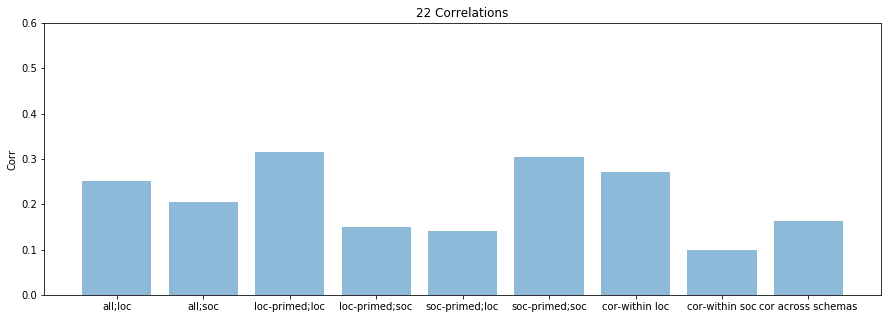

In [25]:
#plot all the correlation values for each story together

for key in a_priori_corr_dict:
    these_labels = ['all;loc', 'all;soc', 'loc-primed;loc', 'loc-primed;soc', 'soc-primed;loc', 'soc-primed;soc','cor-within loc', 'cor-within soc', 'cor across schemas']
    x_pos = np.arange(len(these_labels))
    x, y = a_priori_corr_dict[key]
    a, b = loc_a_priori_corr_dict[key]
    c, d = soc_a_priori_corr_dict[key]
    e = loc_cor[key]
    f = soc_cor[key]
    g = isc_dict[key]
    print(x)
    these_values = [x, y, a, b, c, d, e, f, g]
    print(these_values)
    plt.figure()
    plt.figure(figsize = (15,5))
    plt.bar(x_pos, these_values, align='center', alpha=0.5)
    plt.xticks(x_pos, these_labels)
    plt.ylim([0,0.6])
    plt.ylabel('Corr')
    plt.title(key + ' Correlations')
    plt.savefig('correlation_figs/'+key+'correlation_bar_graphs.png')
